# **Jacob Shearer - Excercise set 1**

In [1]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

**Question 1:**

In [2]:
# Part (a):
print('Part a:')
print('Hello, World.')
print('\n')

# Part (b):
print('Part b:')

# i:
nineteen_billion = 19000000000
print('%e' % nineteen_billion)

# ii:
golden_mean = (np.sqrt(5) - 1) / 2
print(f'The value of the golden mean is {"%.8f" % golden_mean}')

Part a:
Hello, World.


Part b:
1.900000e+10
The value of the golden mean is 0.61803399


**Question 2:**

In [3]:
def sum(N, direction, precision):
    double = True if precision == 'double' else False
    sum = np.float32(0)
    n = 1
    if direction == "up":
        for i in range(N):
            current_term = np.float64(1/n) if double else np.float32(1/n)
            sum += np.float64(current_term) if double else np.float32(current_term)
            n += 1
    else:
        n = N
        for i in range(N):
            current_term = np.float64(1/n) if double else np.float32(1/n)
            sum += np.float64(current_term) if double else np.float32(current_term)
            n -= 1
    
    return sum

In [4]:
# Part (a):
N = 10
print('Part (a):')
s_up = sum(20, 'up', 'double')
s_down = sum(20, 'down', 'double')
print(f"s_up: {s_up}")
print(f"s_down: {s_down}")

Part (a):
s_up: 3.597739657143682
s_down: 3.597739657143682


In [5]:
# Part (b):
print('Part (b):')
print(f'Difference between s_up and s_down: {np.abs(s_up-s_down)}')
print('The fact that this value is zero indcates that the two agree to at least 15 decimal places.')
print('This is quite accurate!')

Part (b):
Difference between s_up and s_down: 0.0
The fact that this value is zero indcates that the two agree to at least 15 decimal places.
This is quite accurate!


In [6]:
# Part (c):
print('Part (c):')
exponents = [2 ,3 , 4, 5, 6, 7]
s_up_differences = np.array([])
s_down_differences = np.array([])
for p in exponents:
    print(f'For {N} to the power of {p}:')
    
    s_up_double = sum(N ** p, 'up', 'double')
    print(f'Sum with double precision: {s_up_double}')
    
    s_up_single = sum(N ** p, 'up', 'single')
    s_down_single = sum(N ** p, 'down', 'single')
    print('s_up with single precision: ' + str(s_up_single))
    print('s_down with single precision: ' + str(s_down_single))
    
    s_up_differences = np.append(s_up_differences, np.abs(np.float32(s_up_double) - s_up_single))
    s_down_differences = np.append(s_down_differences, np.abs(np.float32(s_up_double) - s_down_single))
    
    print('\n')

Part (c):
For 10 to the power of 2:
Sum with double precision: 5.187377517639621
s_up with single precision: 5.187378
s_down with single precision: 5.187377


For 10 to the power of 3:
Sum with double precision: 7.485470860550343
s_up with single precision: 7.4854784
s_down with single precision: 7.4854717


For 10 to the power of 4:
Sum with double precision: 9.787606036044348
s_up with single precision: 9.787613
s_down with single precision: 9.787604


For 10 to the power of 5:
Sum with double precision: 12.090146129863335
s_up with single precision: 12.090851
s_down with single precision: 12.090153


For 10 to the power of 6:
Sum with double precision: 14.392726722864989
s_up with single precision: 14.357358
s_down with single precision: 14.392652


For 10 to the power of 7:
Sum with double precision: 16.695311365857272
s_up with single precision: 15.403683
s_down with single precision: 16.686031




Part (d):
Difference between s_up and s_down (single) when p = 2
0.0


Difference between s_up and s_down (single) when p = 3
6.67572021484375e-06


Difference between s_up and s_down (single) when p = 4
4.76837158203125e-06


Difference between s_up and s_down (single) when p = 5
0.000698089599609375


Difference between s_up and s_down (single) when p = 6
0.0352935791015625


Difference between s_up and s_down (single) when p = 7
1.2823486328125


The fact that all of these values are positive indicates that the difference between s_up_single and s_double 
is always greater than the difference between s_down_single and s_double. This means that s_up_single is less
accurate than s_down_single.


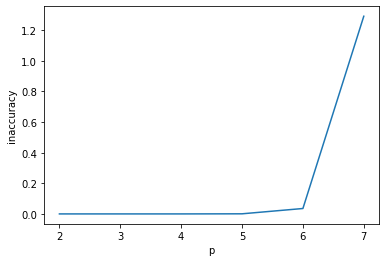

This graph has a positive slope, which indicates that the accuracy of s_up_single decreases with increasing N.


In [7]:
# Part (d):
print('Part (d):')
p = 2
for difference in (s_up_differences - s_down_differences):
    print(f'Difference between s_up and s_down (single) when p = {p}')
    print(difference)
    print('\n')
    p += 1

print('''The fact that all of these values are positive indicates that the difference between s_up_single and s_double 
is always greater than the difference between s_down_single and s_double. This means that s_up_single is less
accurate than s_down_single.''')

plt.plot(np.array(exponents), s_up_differences)
plt.xlabel('p')
plt.ylabel('inaccuracy')
plt.show()
print('This graph has a positive slope, which indicates that the accuracy of s_up_single decreases with increasing N.')

Part (e):
Floating point numbers are stored essentially in parts, with the first part (called the mantissa) corresponding to the magnitude of the number and the second part being the exponent. In order for two floating point numbers of different exponents to be added, the computer will increase the exponent of the smaller number while shifting its mantissa to the right one decimal place and adding a zero to the front. When this shift happens, the rightmost digit in the mantissa no longer has anywhere to be stored, so it is lost, which leads to a decrease in precision.

In the S<sup>up</sup> version of the algorithm, the sum quickly becomes large compared to later terms, which means that the mantissa of each successive term must be shifted more and more, which in turn truncates more and more precision. 

In the S<sup>down</sup> version of the algorithm, the exponent of the sum at any given point remains much closer to the newest term, which means that the mantissa of each successive term doesn't need to be shifted as much as with S<sup>up</sup> and thus less precision is lost.

**Question 3:**

In [28]:
# Part (a):
print('Part (a):')
N = 10
golden_mean = (np.sqrt(5) - 1) / 2
previous_power = 1
a_means = np.array([])
for i in range(N + 1):
    if i == 0:
        current_power = 1
    else:
        current_power = golden_mean * previous_power
    print(f'For n = {i}:')
    print(current_power)
    a_means = np.append(a_means, current_power)
    previous_power = current_power

Part (a):
For n = 0:
1
For n = 1:
0.6180339887498949
For n = 2:
0.3819660112501052
For n = 3:
0.23606797749978975
For n = 4:
0.14589803375031551
For n = 5:
0.09016994374947429
For n = 6:
0.05572809000084125
For n = 7:
0.03444185374863305
For n = 8:
0.021286236252208206
For n = 9:
0.01315561749642485
For n = 10:
0.008130618755783357


Part (b):
    $$ \phi^{n+1} = \phi^{n-1} - \phi^{n} $$
    $$ \Rightarrow \phi^{n+1} + \phi^{n} - \phi^{n-1} $$
The corresponding characteristic equation for this is:
    $$ x^{2} + x - 1 = 0 $$
Solving this via the quadratic formula yields:
    $$ x = \frac{\sqrt{5} \pm 1}{2} $$
$\phi$ is indeed one of these solutions, so the recursion relation is valid.

Part (c):
Double precision:
For n = 0:
1
For n = 1:
0.6180339887498949
For n = 2:
0.3819660112501051
For n = 3:
0.2360679774997898
For n = 4:
0.1458980337503153
For n = 5:
0.09016994374947451
For n = 6:
0.05572809000084078
For n = 7:
0.03444185374863373
For n = 8:
0.021286236252207047
For n = 9:
0.013155617496426686
For n = 10:
0.008130618755780361


Single precision:
For n = 0:
1
For n = 1:
0.618034
For n = 2:
0.381966
For n = 3:
0.23606801
For n = 4:
0.14589798
For n = 5:
0.090170026
For n = 6:
0.05572796
For n = 7:
0.034442067
For n = 8:
0.021285892
For n = 9:
0.013156176
For n = 10:
0.008129716


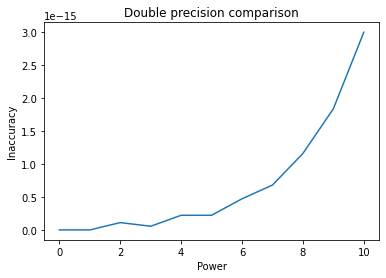

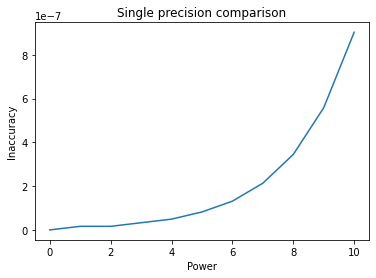

Judging by the exponential decrease in accuracy suggested by these plots, 
it appears that the algorithm is indeed unstable.


In [30]:
# Part (c):
def g_mean_powers(N, precision):
    double = True if precision == 'double' else False
    previous = 1
    later = 0
    if double:
        current = (np.sqrt(5) - 1) / 2
    else:
        current = (np.float32(np.sqrt(5)) - np.float32(1)) / np.float32(2)

    golden_mean_powers = np.array([previous, current])
    for i in range(N + 1):
        print(f'For n = {i}:')
        if i == 0:
            print(previous)
        else:
            print(current)
            later = previous - current if double else np.float32(previous - current)
            golden_mean_powers = np.append(golden_mean_powers, later)
            previous = current
            current = later
    
    golden_mean_powers = np.delete(golden_mean_powers, -1)
    return golden_mean_powers

print('Part (c):')
print('Double precision:')
double_means = g_mean_powers(N, 'double')
print('\n')
print('Single precision:')
single_means = g_mean_powers(N, 'single')

# Graph stuff:
powers = np.arange(0, 11)

plt.plot(powers, np.abs(a_means-double_means))
plt.xlabel('Power')
plt.ylabel('Inaccuracy')
plt.title('Double precision comparison')
plt.show()

plt.plot(powers, np.abs(a_means-single_means))
plt.xlabel('Power')
plt.ylabel('Inaccuracy')
plt.title('Single precision comparison')
plt.show()

print('''Judging by the exponential decrease in accuracy suggested by these plots, 
it appears that the recursion relation is indeed unstable.''')
            

Part (d): From my answer to part b, the recursion relation has another solution besides the golden mean:
    $$ x = \frac{\sqrt5 + 1}{2} $$
This would make the general solution to the recursion relation:
    $$ A_n = (\frac{\sqrt5 + 1}{2})^{n} + (\frac{\sqrt5 - 1}{2})^{n} $$
Probably gonna have to ask about this later

**Question 4:**

Part (a):
The taylor expansion of $f(x)$ is given by 
    $$ f(x) \approx f(x_0) + f^{\prime}(x_0)(x-x_0) + \frac{f^{\prime\prime}(x_0)(x-x_0)^2}{2} + \frac{f^{\prime\prime\prime}(x_0)(x-x_0)^3}{6} + \frac{f^{4}(x_0)(x-x_0)^4}{24} $$

For $f(x_0+h)$, $x-x_0 = h$. So, 
    $$ \Rightarrow f(x_0+h) \approx f(x_0) + f^{\prime}(x_0)h + \frac{f^{\prime\prime}(x_0)h^2}{2} + \frac{f^{\prime\prime\prime}(x_0)h^3}{6} + \frac{f^{4}(x_0)h^4}{24} $$
Similarly, for $f(x_0-h)$, $x-x_0 = -h$:
    $$ \Rightarrow f(x_0-h) \approx f(x_0) - f^{\prime}(x_0)h + \frac{f^{\prime\prime}(x_0)h^2}{2} - \frac{f^{\prime\prime\prime}(x_0)h^3}{6} + \frac{f^{4}(x_0)h^4}{24} $$
Replacing $x_0$ with $x$ and combining these two expressions yields:
    $$ f(x+h) + f(x-h) = 2f(x) + f^{\prime\prime}h^2 + \frac{f^{4}(x)h^4}{12} $$
Finally, solving this for $f^{\prime\prime}(x)$ gives:
    $$ f^{\prime\prime} = \frac{f(x+h) + f(x-h) - 2f(x)}{h^2} + \frac{f^{4}(x)h^2}{12}$$
where $\frac{f^{4}(x)h^2}{12}$ is the leading error term and is of order $h^2$.

In [32]:
# Part (b):
print('Part (b):')
print("I like sin(x), so that's going to be my function.")

x = 5
h = 0.5
approx_sec_der = (np.sin(x + h) + np.sin(x - h) - 2*np.sin(x)) / h**2
sec_der = -np.sin(x)
error_est = (np.sin(x) * h**2) / 12

print(f'h = {h}')
print(f'The approximate second derivative at x = {x} is {approx_sec_der}')
print(f'The real second derivative at x = {x} is {sec_der}')
print(f'The difference between these is {approx_sec_der - sec_der}')
print(f'According to the function above, the error estimate is {error_est}')
print('''The above difference and the error estimate are of the same order, and therefore our error estimate appears to be
fairly accurate''')


Part (b):
I like sin(x), so that's going to be my function.
h = 0.5
The approximate second derivative at x = 5 is 0.9391124243631515
The real second derivative at x = 5 is 0.9589242746631385
The difference between these is -0.019811850299987
According to the function above, the error estimate is -0.01997758905548205
The above difference and the error estimate are of the same order, and therefore our error estimate appears to be
fairly accurate


**Question 5:**